In [2]:
from pathlib import Path
import pandas as pd
import difflib

# Cell 0: carica e mostra il dataset (prova prima il percorso assoluto fornito dall'utente)
target = "middle_east_aggregated_data.csv"
preferred_path = Path("/Users/tommasoraffaghello/Desktop/UNIversità/Data visualization/datafour.github.io/raw_datasets") / target
folder = Path("raw_dataset")
path = preferred_path if preferred_path.exists() else folder / target

if not path.exists():
    # cerca file simili nelle cartelle note
    search_dirs = [preferred_path.parent, folder]
    for d in search_dirs:
        if d.exists() and d.is_dir():
            files = [p.name for p in d.iterdir() if p.is_file()]
            match = difflib.get_close_matches(target, files, n=1, cutoff=0.6)
            if match:
                path = d / match[0]
                print(f"File '{target}' non trovato. Uso file simile: '{match[0]}' in {d}.")
                break
    else:
        available = {}
        for d in search_dirs:
            if d.exists() and d.is_dir():
                available[str(d)] = [p.name for p in d.iterdir() if p.is_file()]
        raise FileNotFoundError(f"File '{target}' non trovato. Controlla i percorsi. File disponibili: {available}")

# Prova diverse opzioni di lettura comuni
read_attempts = [
    {"encoding": "utf-8", "sep": ","},
    {"encoding": "latin1", "sep": ","},
    {"encoding": "utf-8", "sep": ";"},
]

for opts in read_attempts:
    try:
        df = pd.read_csv(path, **opts)
        break
    except Exception as e:
        last_exc = e
else:
    raise last_exc

print(f"Caricato: {path}  (shape: {df.shape})")
print("\nPrime 5 righe:")
print(df.head())
print("\nInfo sul DataFrame:")
df.info()

Caricato: /Users/tommasoraffaghello/Desktop/UNIversità/Data visualization/datafour.github.io/raw_datasets/middle_east_aggregated_data.csv  (shape: (138069, 1))

Prime 5 righe:
                                                            WEEK;REGION;COUNTRY;ADMIN1;EVENT_TYPE;SUB_EVENT_TYPE;EVENTS;FATALITIES;POPULATION_EXPOSURE;DISORDER_TYPE;ID;CENTROID_LATITUDE;CENTROID_LONGITUDE
06-febbraio-2016;Middle East;Bahrain;Capital;Ba... 1927;50                                               5508                                                                                               
25-giugno-2016;Middle East;Bahrain;Capital;Expl... 1927;50                                               5508                                                                                               
11-febbraio-2017;Middle East;Bahrain;Capital;Ex... 1927;50                                               5508                                                                                               
18-f

📊 Eventi di tipo 'Attack' in Palestina (dal 2014 in poi):
  • 2016: 87 eventi
  • 2017: 72 eventi
  • 2018: 111 eventi
  • 2019: 116 eventi
  • 2020: 96 eventi
  • 2021: 84 eventi
  • 2022: 75 eventi
  • 2023: 112 eventi
  • 2024: 159 eventi
  • 2025: 138 eventi


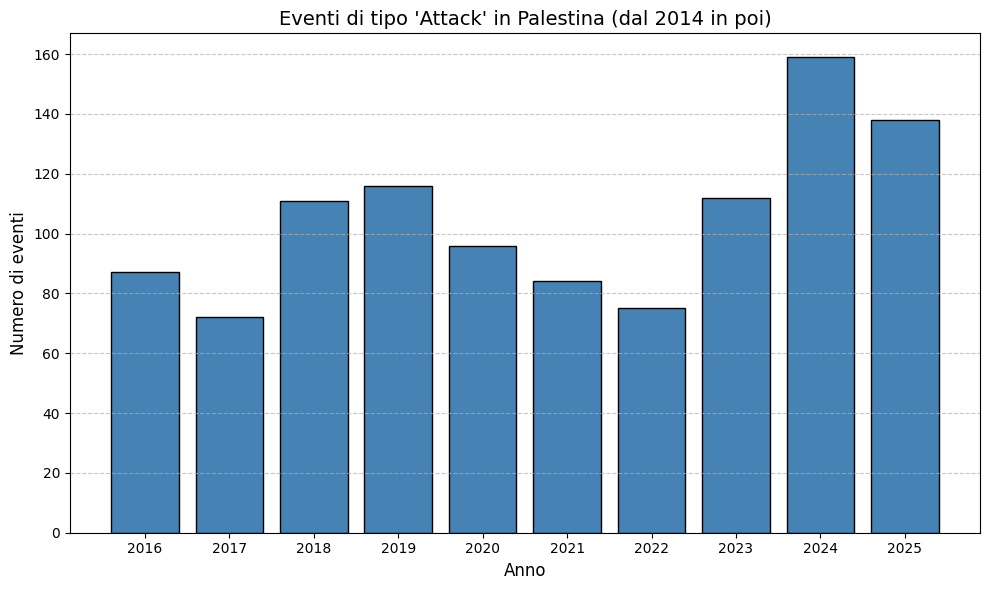

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Leggi il dataset ---
df = pd.read_csv(path, sep=';', encoding='utf-8')

# --- Parsing della data (mesi italiani → inglesi) ---
mesi = {
    'gennaio': 'January', 'febbraio': 'February', 'marzo': 'March',
    'aprile': 'April', 'maggio': 'May', 'giugno': 'June',
    'luglio': 'July', 'agosto': 'August', 'settembre': 'September',
    'ottobre': 'October', 'novembre': 'November', 'dicembre': 'December'
}

# Converte i mesi italiani per estrarre l'anno
df['WEEK_EN'] = df['WEEK'].replace(mesi, regex=True)
df['WEEK_DATE'] = pd.to_datetime(df['WEEK_EN'], errors='coerce', format='%d-%B-%Y')
df['YEAR'] = df['WEEK_DATE'].dt.year

# --- Filtra solo Palestina + Attack (in SUB_EVENT_TYPE) ---
mask = (
    df['COUNTRY'].astype(str).str.contains('Palestin', case=False, na=False) &
    df['SUB_EVENT_TYPE'].astype(str).str.contains('Attack', case=False, na=False)
)
palestine_attack = df[mask].copy()

# --- Filtra solo dal 2014 in poi ---
palestine_attack = palestine_attack[palestine_attack['YEAR'] >= 2014]

if palestine_attack.empty:
    print("⚠️ Nessun evento di tipo 'Attack' trovato per la Palestina nel 2014.")
else:
    # --- Raggruppa per anno ---
    yearly_counts = (
        palestine_attack.groupby('YEAR')
        .size()
        .reset_index(name='count')
        .sort_values('YEAR')
    )

    # --- Stampa riepilogo anno per anno ---
    print("📊 Eventi di tipo 'Attack' in Palestina (dal 2014 in poi):")
    for _, row in yearly_counts.iterrows():
        print(f"  • {int(row['YEAR'])}: {row['count']} eventi")

    # --- Istogramma ---
    plt.figure(figsize=(10,6))
    plt.bar(yearly_counts['YEAR'], yearly_counts['count'], color='steelblue', edgecolor='black')
    plt.title("Eventi di tipo 'Attack' in Palestina (dal 2014 in poi)", fontsize=14)
    plt.xlabel("Anno", fontsize=12)
    plt.ylabel("Numero di eventi", fontsize=12)
    plt.xticks(yearly_counts['YEAR'])  # Mostra ogni anno
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [4]:
/* poi fare la stessa cosa per attacchi e force abduction*/

SyntaxError: invalid syntax (2599117961.py, line 1)